In [7]:
# Test for the estimation of a single image key-points

import argparse
import grpc
import io
import matplotlib.pyplot as plt
import generic_box_pb2
import generic_box_pb2_grpc
from scipy.io import savemat, loadmat
import PIL.Image as PIL_image
import cv2 as cv

## These functions assume the matlab file has one image in variable "image"

In [8]:

def process_image(stub, image_path):
    print(f'Processing image: \'{image_path}\'')

    img = PIL_image.open("img.png")
    dic = {'im0':img}
    print(type(dic))

    savemat("temp2.mat",dic)
    with open("temp2.mat", 'rb') as fp:
        image_bytes = fp.read()

    savemat("temp1.mat",{})
    with open("temp1.mat", 'rb') as fp:
        matfile = fp.read()
    request = generic_box_pb2.YoloData(data2=image_bytes,data1=matfile)
    stub.display(request)


def display_image(stub):
    Data = stub.submit(generic_box_pb2.Empty())
    dados=loadmat(io.BytesIO(Data.file))
    #img = PIL_image.open(io.BytesIO(image.data))
    img=dados['im']
    ax = plt.gca()
    ax.imshow(img)
    plt.show()


### Rotina de teste: cria stub para o serviço,chama função que envia mensagem
Target - Nó onde está a correr o serviço

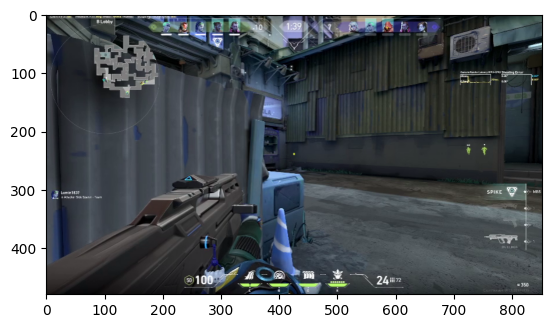

Processing image: 'img.mat'
<class 'dict'>


TypeError: Could not convert None (type <class 'NoneType'>) to array

In [9]:
    target = 'localhost:8061'
    image_path = "img.mat"
    with grpc.insecure_channel(target) as channel:
        estimator_stub = generic_box_pb2_grpc.GenericBoxServiceStub(channel)
        try:
            display_image(estimator_stub)
            process_image(estimator_stub, image_path)
        except grpc.RpcError as rpc_error:
            print('An error has occurred:')
            print(f'  Error Code: {rpc_error.code()}')
            print(f'  Details: {rpc_error.details()}')
